<a href="https://colab.research.google.com/github/khaireddine-satouri/TER-2022-2023/blob/main/X_%26_D_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NUMBER_OF_OBSERVATIONS = 600  # Number of iterations to observe the progression of values
GRAIN = 185                   # the grain classes 
PHI1 = 0.04                   # First bunge angle
PSI = 137.1                   # Second bunge angle
PHI2 = 233.02                 # Third bunge angle 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve

In [ ]:
# Charger les données
df = pd.read_excel("Data_Sheet.xlsx", header=0)
df.head()

,Grain,Phi1 (°),Psi (°),Phi2 (°),h (nm),P (mN),x (µm),d (nm)
0,10,105.81,94.4,192.38,0.000000,0.000000,-2.390996,64.32688
1,10,105.81,94.4,192.38,1.817280,4.001145,-2.381237,64.46653
2,10,105.81,94.4,192.38,2.879298,9.905321,-2.371478,64.85121
3,10,105.81,94.4,192.38,4.122832,16.590043,-2.361719,65.14177
4,10,105.81,94.4,192.38,5.172039,22.889292,-2.351960,65.31030


In [ ]:
df.shape

(2977, 8)

In [ ]:
df.isnull().sum()

Grain         0
Phi1 (°)      0
Psi (°)       0
Phi2 (°)      0
h (nm)        0
P (mN)        0
x (µm)      639
d (nm)      639
dtype: int64

In [ ]:
df = df.dropna(subset=['x (µm)', 'd (nm)'])
df.isnull().sum()

Grain       0
Phi1 (°)    0
Psi (°)     0
Phi2 (°)    0
h (nm)      0
P (mN)      0
x (µm)      0
d (nm)      0
dtype: int64

In [ ]:
# Create an artificial time column by adding a sequence of integers representing the elapsed time since the start of the observation.
# Group data by Grain
grouped_data = df.groupby('Grain')
df['Time']=grouped_data.cumcount()
df['grain-Time'] = (df['Grain'].astype(str) + df['Time'].astype(str)).astype(int)

print(df['grain-Time'].head(595))

0        100
1        101
2        102
3        103
4        104
       ...  
760    11167
761    11168
762    11169
763    11170
764    11171
Name: grain-Time, Length: 595, dtype: int64


In [ ]:
X = df[['Phi1 (°)', 'Psi (°)', 'Phi2 (°)','Time', 'grain-Time']]
y = df[['x (µm)', 'd (nm)']]

# Training RFR model using learning curves and cross-validation

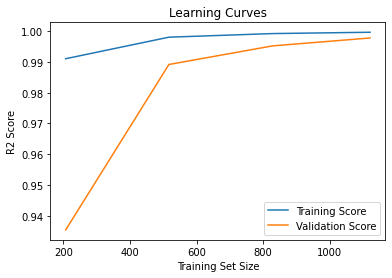

Score R2  0.9983466191856524


In [ ]:
# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
dataset = df.sample(frac=1).reset_index(drop=True)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

# Training the Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train, y_train, train_sizes=np.array([ 207, 517, 828, 1121]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Calculate feature importance
importances = rfr.feature_importances_

# Plot the feature importances in a bar plot


# Use the final model to predict on the test set and evaluate the accuracy
y_pred = rfr.predict(X_test)
r2_score = rfr.score(X_test, y_test)
print("Score R2 ",r2_score)




In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 

In [ ]:
# Test the model on new values
observation_number = 600
grains_test=list(df["Grain"].unique())
PHI1_test=list(df["Phi1 (°)"].unique())
PSI_test=list(df["Psi (°)"].unique())
PHI2_test=list(df["Phi2 (°)"].unique())
print(PHI1_test)

[105.81, 3.89, 158.75, 0.04]


In [ ]:
observation_number = 600
test_classes = df[['Grain', 'Phi1 (°)', 'Psi (°)', 'Phi2 (°)']].drop_duplicates().values.tolist()

R2 Score of grain 10:  1.0


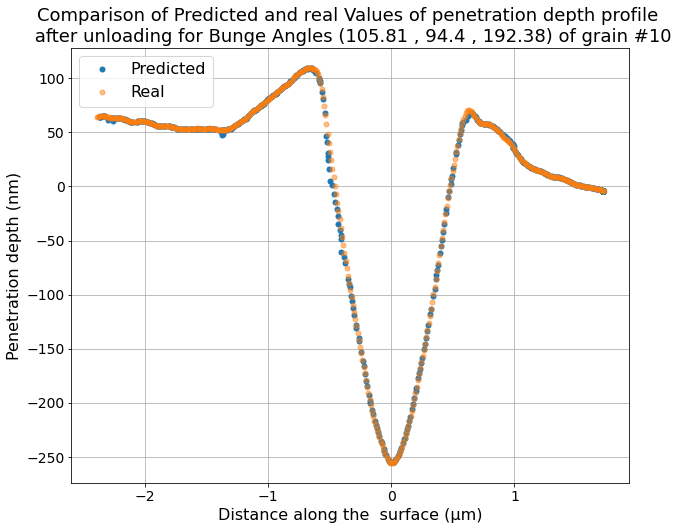

Predicted values [x (µm), d (nm)] of grain 10: 
 [[-2.36784488 64.08154633]
 [-2.36784488 64.08154633]
 [-2.36784488 64.08154633]
 ...
 [ 1.71634505 -4.0360373 ]
 [ 1.71634505 -4.0360373 ]
 [ 1.71634505 -4.0360373 ]]
R2 Score of grain 11:  1.0


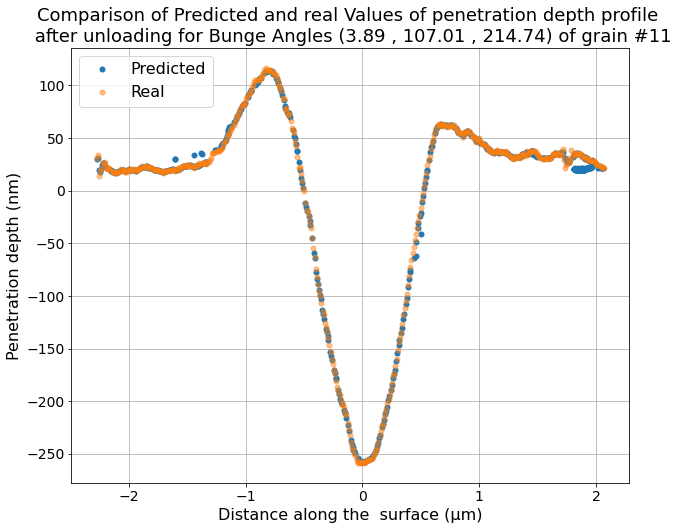

Predicted values [x (µm), d (nm)] of grain 11: 
 [[-2.26858662 30.17027593]
 [-2.26330756 31.106144  ]
 [-2.25521143 19.5123457 ]
 ...
 [ 1.95993197 22.63320483]
 [ 1.95993197 22.63320483]
 [ 1.95993197 22.63320483]]
R2 Score of grain 16:  1.0


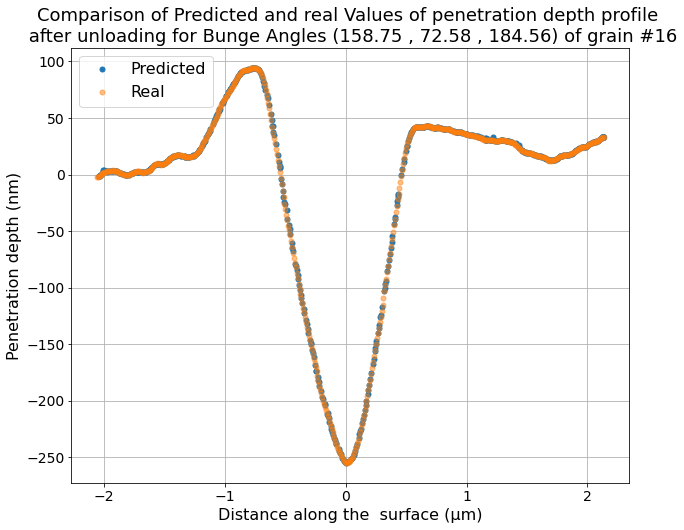

Predicted values [x (µm), d (nm)] of grain 16: 
 [[-2.04601707 -1.382405  ]
 [-2.04601707 -1.382405  ]
 [-2.04601707 -1.382405  ]
 ...
 [ 2.13361652 33.239175  ]
 [ 2.13361652 33.239175  ]
 [ 2.13361652 33.239175  ]]
R2 Score of grain 181:  1.0


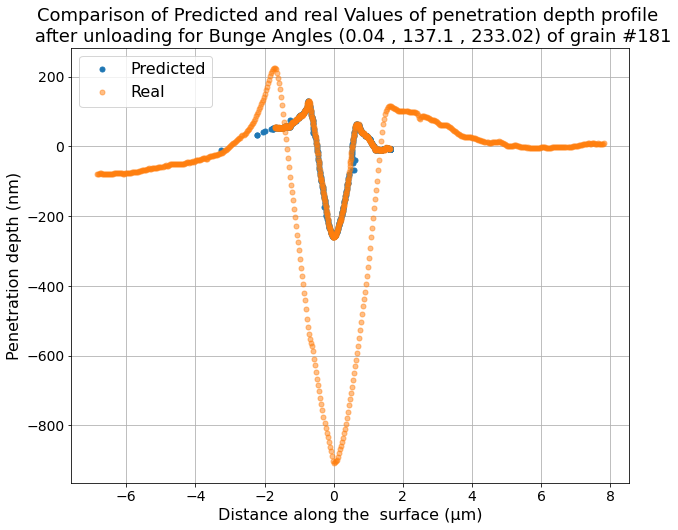

Predicted values [x (µm), d (nm)] of grain 181: 
 [[-1.79917107 51.16265388]
 [-1.74434337 53.04390489]
 [-1.74036202 53.25443289]
 ...
 [ 1.61822248 -5.93428   ]
 [ 1.61822248 -5.93428   ]
 [ 1.61822248 -5.93428   ]]
R2 Score of grain 185:  1.0


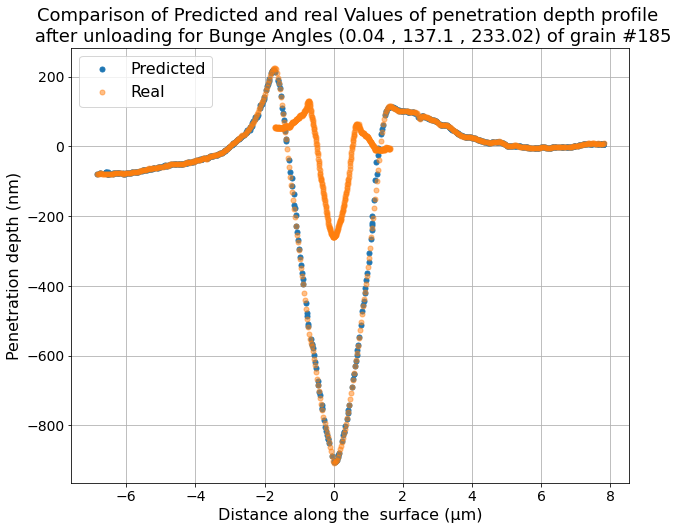

Predicted values [x (µm), d (nm)] of grain 185: 
 [[ -6.83650645 -77.8596809 ]
 [ -6.7725725  -76.37440219]
 [ -6.7503028  -76.44653919]
 ...
 [  7.80435963   8.1559219 ]
 [  7.80435963   8.1559219 ]
 [  7.80435963   8.1559219 ]]


In [ ]:
from itertools import product
for t in test_classes:
  #for t in i:   
    j_values = list(range(observation_number))
    #k_values = list(range(grain_observation_number_min, grain_observation_number_max + 1 ))
    X_new = np.array([[t[1], t[2], t[3], j_values[j], int(str(int(t[0]))+str(j))] for j in range(len(j_values))])
    y_pred = rfr.predict(X_new)
    r2_score = rfr.score(X_new, y_pred)
    print(f"R2 Score of grain {int(t[0])}: ",r2_score)
    # Get the actual values for comparison
    y_real = df.loc[(df['Phi1 (°)'] == t[1]) & (df['Psi (°)'] == t[2]) & (df['Phi2 (°)'] == t[3]) & (df['Time'] < observation_number) & (df['grain-Time'] < (df['Grain'].astype(str)+str(observation_number)).astype(int)), ['x (µm)', 'd (nm)']].values
    # Set plot parameters
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel('Distance along the  surface (µm)', fontsize=16)
    ax.set_ylabel('Penetration depth (nm)', fontsize=16)
    ax.set_title(f'Comparison of Predicted and real Values of penetration depth profile \n after unloading for Bunge Angles ({t[1]} , {t[2]} , {t[3]}) of grain #{int(t[0])}', fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True)

    # Plot the predicted and actual values
    ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted', markersize=10)
    ax.plot(y_real[:, 0], y_real[:, 1], '.', label='Real', markersize=10, alpha=0.5)
    ax.legend(fontsize=16, loc='upper left')

    plt.show()

    print(f"Predicted values [x (µm), d (nm)] of grain {int(t[0])}: \n",y_pred)

# Predict penetration depth profile for new bunge angles

In [ ]:
X_new = np.array([[104.3, 92.0 , 190.49, i , int(str(GRAIN)+str(i))] for i in range(NUMBER_OF_OBSERVATIONS)])
y_pred = rfr.predict(X_new)
print(y_pred)

[[ -6.83650645 -77.8596809 ]
 [ -6.7725725  -76.37440219]
 [ -6.7503028  -76.44653919]
 ...
 [  7.80435963   8.1559219 ]
 [  7.80435963   8.1559219 ]
 [  7.80435963   8.1559219 ]]


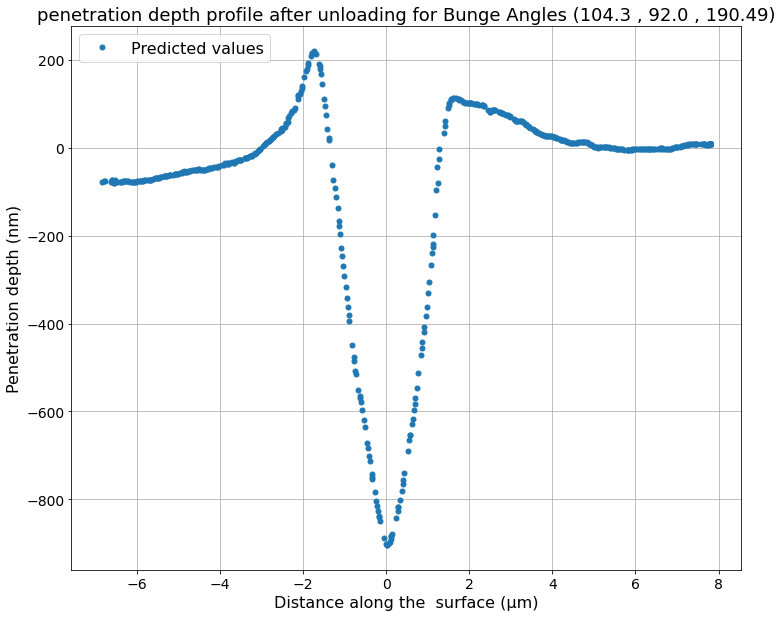

In [ ]:
# Set plot parameters
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlabel('Distance along the  surface (µm)', fontsize=16)
ax.set_ylabel('Penetration depth (nm)', fontsize=16)
ax.set_title(f'penetration depth profile after unloading for Bunge Angles ({104.3} , {92.0} , {190.49})', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

# Plot the relationship between P (mN) and h (nm) predicted values
ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted values', markersize=10)
ax.legend(fontsize=16, loc='upper left')

plt.show()
